# Project: IMDB Movie Data Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have been a movie fan since I was a kid. As the years went on, I had always had the feeling that movies, in general, have gotten longer. For this excercise I am going to use movie run time as my dependent variable to find the information outlined below. Also, Do more popular movies have a higher revenue associated with them?

> 1.) Have movie run times gotten longer over time?

> 2.) Is there a relationship between movie run time and popularity?

> 3.) Do more popular movies have higher revenues?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

> First step is to get a look at the data in its raw format. Next I will look at the overall rows and columns, what types of data are in the data frame, check for nulls, check for duplicates. In the data cleaning section I will outline the methodology for cleaning the data. I droped any columns which could not help me answer my question and created a new data frame called df_drp (see below for the list of columns which were dropped). See the data cleaning section below for an outline of what was droped and why.

### General Properties

In [2]:
# Get a quick look at the data. For the most part I will be focusing on popularity.
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [3]:
# how many rows and columns
df.shape

(10866, 21)

In [4]:
#what are the different data types in the data
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
#check to see if there are any nulls
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#Check for duplicates
sum(df.duplicated())

1

### Data Cleaning
> In this section I will remove duplicated rows, remove any columns that i do not need, and handle null values for the remaining data

> I found that the data set has 1 duplicated row, Step 6 (above), so i removed it with the code in step 7 below 

> I did not need most of the columns in the data set to answer the questions that I was looking for so i used the drop() function to remove unwanted columns:

> 'id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres','production_companies', 'vote_count', 'vote_average', and 'director'

> The data set had qite a few null values (see step 5 above), however all of the null values were contained in the columns which I dropped, so I did not need to worry about them after I executed the drop statement. 

> I assigned the result of the drop() statement to a new dataframe called df_drp and ran a describe() on the new dataframe. I found that a there were a lot of 0 values for budget, revenue, budgedt_adj, and revenu_adj. I decided to replace the 0 value rows with the mean of the column (step 12 below). This had the effect of increasing the mean in these columns by between 52% and 55%. Below is a table which outlines the change in mean for each column before replacing the 0  values and after.

|	     | budget	   |revenue      |runtime    |budget_adj	 |   revenue_adj |
|--------|-------------|-------------|-----------|---------------|---------------|
|Before	 | 14,624,290  | 39,826,900  | 102.07    | 17,549,890    | 51,369,000    |
|After	 | 22,291,100  | 61,879,230  | 102.36    | 26,750,460    | 79,812,250    |
|Change  | 7,666,810   | 22,052,330  |  0.29 	 | 9,200,570     | 28,443,250    |
|% Change|  52.43%	   |    55.37%	 |  0.29%	 |     52.43%	 |      55.37%   |


In [7]:
# Drop out duplicated values and verify they have been droped. 
df.drop_duplicates(inplace=True)
#verify
sum(df.duplicated())

0

In [8]:
# For the purposes of this excercise, I do not need most of the columns. Movie runtime is my dependent variable and I will be 
# using revenue, popularity, and a derived column called pop_index (explained below) as my independent variables.
df_drp = df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres','production_companies', 'vote_count', 'vote_average', 'director'], axis = 1)


In [9]:
#Check for nulls 
df_drp.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
release_date      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [10]:
df_drp.shape

(10865, 9)

# Describe the new data frame
>  The majority of runtimes are between 90 and 111 minutes. Popularity has some outliers. Max value is ~33, however the majority of data lies between .21 and .72. I checked the documentation and could not find any information on how this metric is calculated, so I am going to standardize it by comparing each data point in the 'popularity' column against the mean (by subtracting the value from the mean) if the value is higher, then it is more of a popular movie, if lower then it is less popular. I will add it into the data frame as a new column. 

In [11]:
df_drp.describe()

,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
#replace 0 values with the mean of the column
df_drp = df_drp.replace(0, df_drp.mean())

In [13]:
#check to see that it worked
df_drp.describe()

,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,2.229110e+07,6.187923e+07,102.363021,2001.321859,2.675046e+07,7.981225e+07
std,1.000231,2.801385e+07,1.110236e+08,30.904043,12.813260,3.051007e+07,1.365647e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,1.462429e+07,3.982690e+07,90.000000,1995.000000,1.754989e+07,5.136900e+07
50%,0.383831,1.462429e+07,3.982690e+07,99.000000,2006.000000,1.754989e+07,5.136900e+07
75%,0.713857,1.500000e+07,3.982690e+07,111.000000,2011.000000,2.085325e+07,5.136900e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
# Create a 'pop_index' column. Negative values in this column indicate a movie which is less popular 
# (the value in the column is less than the average popularity)

df_drp['pop_index'] =  df_drp['popularity'] - df_drp['popularity'].mean()
df_drp.head()

,popularity,budget,revenue,original_title,runtime,release_date,release_year,budget_adj,revenue_adj,pop_index
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,6/9/2015,2015,137999939.3,1.392446e+09,32.339317
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,5/13/2015,2015,137999939.3,3.481613e+08,27.773490
2,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,3/18/2015,2015,101199955.5,2.716190e+08,12.466061
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,12/15/2015,2015,183999919.0,1.902723e+09,10.526658
4,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,4/1/2015,2015,174799923.1,1.385749e+09,8.688568


<a id='eda'></a>
## Exploratory Data Analysis

> Below is a histogram for each field. Most skew right with the exception of the release year which skews left, indicating that most of the movies in the database are more modern (approx. 1995 onward which is confirmed above). Popularity appears as if it is falling between 0 and about 4 or 5, however if we look at the summary data above, we can tell that the majority of the area in the histogram is probably taken up with values between .209 and .716. 

### Check overall data layout

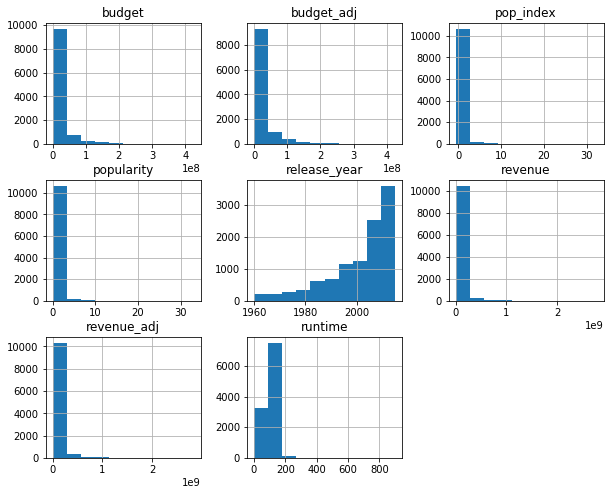

In [15]:
# first lets see the distrubition of each field.
df_drp.hist(figsize=(10, 8));

##  1.) Have movie run times gotten longer over time?
> Although more movies have been made from 1995 onward, the average runtime has decreased since the 1960's. 

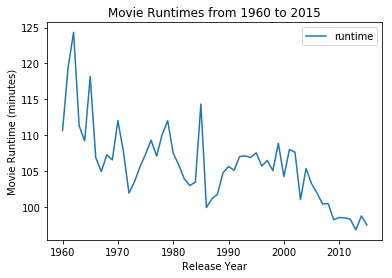

In [16]:
plt.plot(df_drp.groupby('release_year').runtime.mean())
plt.plot(kind='line', label='Runtime')
plt.xlabel('Release Year')
plt.ylabel('Movie Runtime (minutes)')
plt.title('Movie Runtimes from 1960 to 2015')
plt.legend()
plt.show();

You can see in the graph above that average movie runtimes have decreased over the years. There seems to be spikes in movie run times every 5 years or so, but the overall trend is downward.

## 2.) Is there a relationship between movie run time and popularity?
> I am taking the sum of the pop_index which is described above. In the graph below I limited the data to 250 minutes to remove the outlying data.

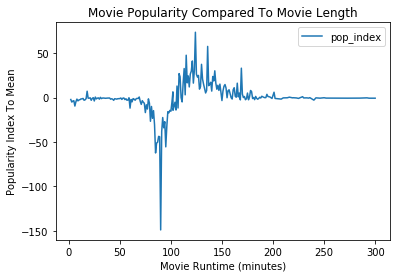

''

In [17]:
#limit to runtime of 250 based on the graph above to throw out outlying run times
df_limited = df_drp[df_drp['runtime'] <= 300]
plt.plot(df_limited.groupby('runtime').pop_index.sum())
plt.plot(kind='line', label='Popularity', color='r')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Popularity Index To Mean')
plt.title('Movie Popularity Compared To Movie Length')
plt.legend()
plt.show()
;

This above graph looks at movie runtime (minutes on the x-axis) as compared to a popularity index. The index (y-axis) is derived by comparing each movies popularity score to the average score (popularity score - average). If the index is positive, the movie has has a higher than average score, and if negative, a lower than average score. The graph is generated by summing the indxes by runtimes. You can see that between about 70 and 90 minutes there is a large drop off in popularity. From about 105 to 150 minutes there is an increase in popularity score, indicating that movies between 105 and 150 may be more popular with consumers. 

## 3.) Is there a relationship between adjusted revenue and release year?

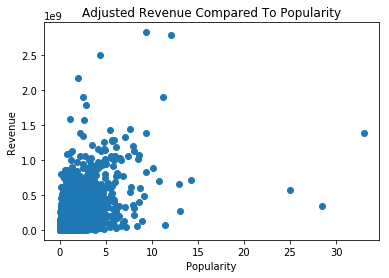

In [18]:
# I am not quite sure why, but i cannont seem to change the color of the graph
plt.scatter(df_drp['popularity'], df_drp['revenue_adj'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Adjusted Revenue Compared To Popularity')
plt.show();

<a id='conclusions'></a>
## Conclusions

> I had initially thought that runtimes for movies were increasing over time, however it looks as if the average run time is decreasing. 

> Between 70 minutes and 90 minutes,  movie popularity indexes take a sharp decline. Between 105 and 150 minutes, the popularity increases and then baselines out at an index of approximately 1 after a run time of about 175 min.

> Overall adjusted revenue have a popularity score between 0 and 5 and revenue of 500 million dollars or less.

### Limitations
> It appears as if there is more data as time goes on. The histogram for release year skews left with the balancing point being somewhere around 1995, so older data is not as well represented, which may have an effect on the analysis. 

> The popularity index is not well defined from Kaggle, and there appears to be some very large outliers in popularity, which makes interpretation of the popularity index difficult. Future iterations on this analysis should have some methodology for dealing with the outliers

> I replaced all values that have a 0 value in the budget, revenue, runtime, budget_adj, and revenue_adj columns with the mean of their respective columns. This had the effect of increasing the mean by about 52% to 55%, which is a relatively huge increase. Future iterations of this report will need to handle the 0 values more effectively. One method may be to assign the 0 values based on the mean revenue of the year in which the movie was released.

> It is not known if the budgets and revenue are all in US Dollars.

> The dataset contains approximately 10000 movies and is a subset of all movies that have ever been created. Movies that were created before 1960 were not included in the analysis.


> It is important to note that the trends above are showing correlation, but not causation. 